In [17]:
import pandas as pd
import numpy as np
from src.clustering import KMEANS, ApplyDBSCAN, FindOptimalK

In [18]:
df_features = pd.read_csv('../data/scaled.csv')

In [19]:
optimal_k = FindOptimalK(df_features) + 1
print(f"Optimal K: {optimal_k}")

Optimal K: 3


In [20]:
if "kmeans_cluster" not in df_features.columns:
    df_features["kmeans_cluster"] = -1  # Domyślna wartość, np. -1

if "dbscan_cluster" not in df_features.columns:
    df_features["dbscan_cluster"] = -1  # Domyślna wartość, np. -1

In [21]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

In [22]:
features_clean = df_features.drop(["kmeans_cluster", "dbscan_cluster"], axis=1, errors='ignore')
neighbours = NearestNeighbors(n_neighbors=optimal_k)
neighbours_fit = neighbours.fit(features_clean)
distances, indices = neighbours_fit.kneighbors(features_clean)
distances = np.sort(distances[:,optimal_k-1])

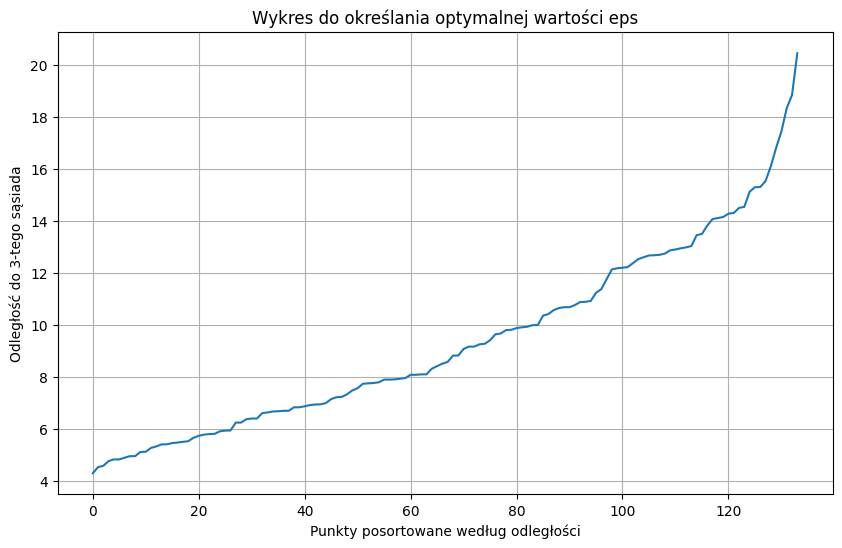

In [23]:
plt.figure(figsize=(10,6))
plt.plot(distances)
plt.xlabel("Punkty posortowane według odległości")
plt.ylabel(f"Odległość do {optimal_k}-tego sąsiada")
plt.title("Wykres do określania optymalnej wartości eps")
plt.grid(True)
plt.show()

In [24]:
kmeans_labels, kmeans_model = KMEANS(df_features, n_clusters=optimal_k)
#kmeans_labels, kmeans_model = KMEANS(df_features.drop(columns=["kmeans_cluster", "dbscan_cluster"]), n_clusters=optimal_k)
df_features["kmeans_cluster"] = kmeans_labels

In [49]:
#dbscan_labels, dbscan_model = ApplyDBSCAN(features=df_features, eps=1.0, min_samples=5)
dbscan_labels, _ = ApplyDBSCAN(df_features.drop(columns=["kmeans_cluster", "dbscan_cluster"]), eps=6.0, min_samples=4)
df_features["dbscan_cluster"] = dbscan_labels

In [50]:
df_features["dbscan_cluster"] = dbscan_labels

In [51]:
df_features.to_csv('../data/clustered_data.csv', index=False)

In [52]:
display(df_features.head())

,id,alcoholic,has_Port,has_Whipped Cream,has_Egg,has_Light Rum,has_Galliano,has_Blue Curacao,has_Bitters,has_Sherry,...,has_Scotch,has_Ice,has_Heavy cream,has_Apricot Brandy,has_Triple Sec,has_Lemon Peel,has_Orange Bitters,has_Raspberry syrup,kmeans_cluster,dbscan_cluster
0,-1.129664,0.0,-0.175412,-0.086711,-0.123091,2.387467,-0.086711,-0.15133,-0.29905,-0.123091,...,-0.234772,-0.123091,-0.123091,-0.196875,-0.418854,-0.381181,-0.196875,-0.086711,1,1
1,-1.126390,0.0,-0.175412,-0.086711,-0.123091,-0.418854,-0.086711,-0.15133,-0.29905,-0.123091,...,-0.234772,-0.123091,-0.123091,-0.196875,-0.418854,-0.381181,-0.196875,-0.086711,0,1
2,-1.123115,0.0,-0.175412,-0.086711,-0.123091,2.387467,-0.086711,-0.15133,-0.29905,-0.123091,...,-0.234772,-0.123091,-0.123091,-0.196875,-0.418854,-0.381181,-0.196875,-0.086711,1,1
3,-1.119840,0.0,-0.175412,-0.086711,-0.123091,-0.418854,-0.086711,-0.15133,-0.29905,-0.123091,...,-0.234772,-0.123091,-0.123091,-0.196875,-0.418854,-0.381181,-0.196875,-0.086711,0,1
4,-1.116565,0.0,-0.175412,-0.086711,-0.123091,-0.418854,-0.086711,-0.15133,-0.29905,-0.123091,...,-0.234772,-0.123091,-0.123091,-0.196875,-0.418854,-0.381181,-0.196875,-0.086711,1,0
